In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
!pip install classy-classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c1641fdfff1dbfce11998ad889e1d2159c6027a1efe92aa5d52c94121f3a46e6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [13]:
!python -m spacy download en_core_web_md

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [14]:
import spacy
import classy_classification
nlp = spacy.load("en_core_web_md")

In [91]:
##### create 20 sentences about cat, start from "they"
Cat_sample = [
        'They are graceful creatures, moving with elegance and poise.',
        'They have keen senses, making them excellent hunters.',
        'They are known for their independent and aloof nature.',
        'They have retractable claws that help them climb and defend themselves.',
        'They are curious beings, always exploring their surroundings.',
        'They communicate through various vocalizations and body language.',
        'They groom themselves meticulously, keeping their fur clean and tidy.',
        'They are agile jumpers, capable of leaping great heights.',
        'They enjoy lounging in warm spots, soaking up the sun.',
        'They are beloved pets, providing comfort and companionship to their owners.',
        'They have a strong sense of territory, marking their space with scent glands.',
        'They are adaptable animals, thriving in both urban and rural environments.',
        'They are known for their ability to land on their feet, thanks to their flexible spines.',
        'They are creatures of habit, often following daily routines.',
        'They are nocturnal hunters, using their excellent night vision to catch prey.',
        'They are social animals, forming bonds with other cats and even some humans.',
        'They are playful and enjoy toys that mimic prey, such as feathers and balls.',
        'They are known for their excellent hunting skills, helping control rodent populations.',
        'They are clean animals, burying their waste in litter boxes or sand.',
        'They are mysterious and have been the subject of folklore and superstitions throughout history.']



Snake_sample = [
        'They are fascinating reptiles that come in various sizes and colors.',
        'They are cold-blooded creatures that rely on external sources to regulate their body temperature.',
        'They are found in diverse habitats, ranging from rainforests to deserts.',
        'They use their forked tongues to detect scents in the air and gather information about their surroundings.',
        'They shed their skin periodically to accommodate their growing bodies.',
        'They are efficient predators, using their sharp fangs and venom to subdue their prey.',
        'They have excellent camouflage, enabling them to blend in with their surroundings and avoid predators.',
        'They are essential to ecosystems as both predator and prey, helping maintain the balance of nature.',
        'They can be found on almost every continent except Antarctica.',
        'They are often misunderstood and feared, but many snake species are non-venomous and harmless to humans.',
        'They are known for their unique way of moving, using a serpentine motion.',
        'They have unique eyes with a transparent scale, which provides them with protection while still allowing them to see.',
        'They are able to unhinge their jaws to consume large prey.',
        'They have been the subject of many myths and legends throughout human history.',
        'They are ectothermic, meaning they rely on external heat sources to warm up their bodies.',
        'They have a strong sense of smell, even though they lack a sense of hearing.',
        'They play crucial roles in the food chain, controlling populations of rodents and other small animals.',
        'They are known for their ability to climb trees and swim through water.',
        'They have specialized teeth that are replaced throughout their lives.',
        'They are a diverse group of reptiles, ranging from harmless garter snakes to deadly cobras.']

Gaussian_sample = [
    'The Gaussian distribution, also known as the normal distribution, is a bell-shaped probability distribution.',
    'The Gaussian distribution is widely used in statistics and probability theory.',
    'It is characterized by its mean and standard deviation, which determine its shape and spread.',
    'Many natural phenomena, such as human height or IQ scores, follow a Gaussian distribution.',
    'The Central Limit Theorem states that the sum of a large number of independent random variables tends to follow a Gaussian distribution.',
    'The Gaussian distribution is symmetric around its mean.',
    'The probability density function of the Gaussian distribution is given by the formula f(x) = (1 / (σ * √(2π))) * exp(-(x - μ)^2 / (2σ^2)).',
    'The Gaussian distribution has infinite support, extending from negative infinity to positive infinity.',
    'The area under the Gaussian curve is equal to 1, representing the total probability of all outcomes.',
    'The 68-95-99.7 rule states that approximately 68%, 95%, and 99.7% of the data lies within 1, 2, and 3 standard deviations from the mean, respectively.',
    'The Gaussian distribution is often used in data modeling, hypothesis testing, and parameter estimation.',
    'In practice, the Gaussian distribution is commonly approximated by real-world data, especially when sample sizes are large.',
    'The concept of outliers is important when dealing with Gaussian distributions as extreme values can significantly affect the mean and standard deviation.',
    'The Gaussian distribution is the foundation of many machine learning algorithms, such as Gaussian Naive Bayes and Gaussian Mixture Models.',
    'The mean of a Gaussian distribution represents the central value or the expected value of the data.',
    'The standard deviation of a Gaussian distribution measures the dispersion or spread of the data points.',
    'The variance, which is the square of the standard deviation, is another measure of data variability in the Gaussian distribution.',
    'The sum of two independent Gaussian random variables is also Gaussian.',
    'In a normal Q-Q plot, if the data points fall along a straight line, it suggests that the data follows a Gaussian distribution.',
    'The Gaussian distribution is widely studied in mathematical statistics and plays a fundamental role in the field of probability theory'
]

## Cat-Gaussian Model

### Model 1 - spacy

In [474]:
train_data = {"cat": Cat_sample[:15],"gaussian": Gaussian_sample[:15]}
test_data  = {"cat": Cat_sample[15:],"gaussian": Gaussian_sample[15:]}
label_1    = 'cat'
label_2    = 'gaussian'

In [475]:
nlp = spacy.load('en_core_web_md')
nlp.add_pipe("text_categorizer",config={"data": train_data,"model":"spacy"})

In [476]:
df1          = pd.DataFrame(train_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(train_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
train_df     = pd.concat([df1, df2], axis=0,ignore_index=True)

df1          = pd.DataFrame(test_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(test_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
test_df      = pd.concat([df1, df2], axis=0,ignore_index=True)

for i in range(len(test_df)):
    text = test_df.loc[i,'text']
    pred = nlp(text)._.cats
    test_df.loc[i,label_1] = pred[label_1] 
    test_df.loc[i,label_2] = pred[label_2]
test_df

,text,label,cat,gaussian
0,"They are social animals, forming bonds with ot...",cat,0.963348,0.036652
1,They are playful and enjoy toys that mimic pre...,cat,0.893949,0.106051
2,They are known for their excellent hunting ski...,cat,0.920155,0.079845
3,"They are clean animals, burying their waste in...",cat,0.964994,0.035006
4,They are mysterious and have been the subject ...,cat,0.885933,0.114067
5,The standard deviation of a Gaussian distribut...,gaussian,0.041503,0.958497
6,"The variance, which is the square of the stand...",gaussian,0.019597,0.980403
7,The sum of two independent Gaussian random var...,gaussian,0.033882,0.966118
8,"In a normal Q-Q plot, if the data points fall ...",gaussian,0.052964,0.947036
9,The Gaussian distribution is widely studied in...,gaussian,0.036673,0.963327


In [134]:
for i in range(len(train_df)):
    text = train_df.loc[i,'text']
    pred = nlp(text)._.cats
    train_df.loc[i,label_1] = pred[label_1] 
    train_df.loc[i,label_2] = pred[label_2]
train_df

,text,label,cat,gaussian
0,"They are graceful creatures, moving with elega...",cat,9.606501e-01,0.039350
1,"They have keen senses, making them excellent h...",cat,9.746380e-01,0.025362
2,They are known for their independent and aloof...,cat,9.302007e-01,0.069799
3,They have retractable claws that help them cli...,cat,9.773666e-01,0.022633
4,"They are curious beings, always exploring thei...",cat,9.755187e-01,0.024481
5,They communicate through various vocalizations...,cat,9.301621e-01,0.069838
6,"They groom themselves meticulously, keeping th...",cat,9.852520e-01,0.014748
7,"They are agile jumpers, capable of leaping gre...",cat,9.301551e-01,0.069845
8,"They enjoy lounging in warm spots, soaking up ...",cat,9.878236e-01,0.012176
9,"They are beloved pets, providing comfort and c...",cat,9.651307e-01,0.034869


In [146]:
def calc_metric(df):
    act  = df['label'].apply(lambda x: 1 if x == 'cat' else 0).tolist()
    pred = df['cat']
    auc   = roc_auc_score(act,pred)
    auprc = average_precision_score(act, pred)
    return auc, auprc

In [147]:
calc_metric(train_df)

(1.0, 1.0)

In [148]:
calc_metric(train_df)

(1.0, 1.0)

### Model 2, small training data

In [164]:
train_data = {"cat": Cat_sample[:5],"gaussian": Gaussian_sample[:5]}
test_data  = {"cat": Cat_sample[5:],"gaussian": Gaussian_sample[5:]}
label_1    = 'cat'
label_2    = 'gaussian'

nlp = spacy.load('en_core_web_md')
nlp.add_pipe("text_categorizer",config={"data": train_data,"model":"spacy"})

df1          = pd.DataFrame(train_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(train_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
train_df     = pd.concat([df1, df2], axis=0,ignore_index=True)

df1          = pd.DataFrame(test_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(test_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
test_df      = pd.concat([df1, df2], axis=0,ignore_index=True)

for i in range(len(test_df)):
    text = test_df.loc[i,'text']
    pred = nlp(text)._.cats
    test_df.loc[i,label_1] = pred[label_1] 
    test_df.loc[i,label_2] = pred[label_2]
print(test_df)

for i in range(len(train_df)):
    text = train_df.loc[i,'text']
    pred = nlp(text)._.cats
    train_df.loc[i,label_1] = pred[label_1] 
    train_df.loc[i,label_2] = pred[label_2]
print(train_df)

print(calc_metric(train_df))

print(calc_metric(test_df))

                                                 text     label       cat  \
0   They communicate through various vocalizations...       cat  0.592170   
1   They groom themselves meticulously, keeping th...       cat  0.894173   
2   They are agile jumpers, capable of leaping gre...       cat  0.732002   
3   They enjoy lounging in warm spots, soaking up ...       cat  0.831079   
4   They are beloved pets, providing comfort and c...       cat  0.914727   
5   They have a strong sense of territory, marking...       cat  0.435063   
6   They are adaptable animals, thriving in both u...       cat  0.768556   
7   They are known for their ability to land on th...       cat  0.838218   
8   They are creatures of habit, often following d...       cat  0.704337   
9   They are nocturnal hunters, using their excell...       cat  0.854287   
10  They are social animals, forming bonds with ot...       cat  0.821592   
11  They are playful and enjoy toys that mimic pre...       cat  0.750390   

In [485]:
experiments = ["This ia a cat",
               "They are cats",
               "In general a cat face is symmetic",
               "When I was observing this cat playing, I suddenly thought of the Gaussian distribution, just like the behavior of this cat, Gaussian distribution also exhibits elegant and continuous characteristics.",
               "Sunset paints the sky golden.",
               "The first rule of Fight Club is: you do not talk about Fight Club."]
for i in experiments:
    print(i)
    print(nlp(i)._.cats)


This ia a cat
{'cat': 0.060048151491798867, 'gaussian': 0.9399518485082011}
They are cats
{'cat': 0.9993348466408367, 'gaussian': 0.0006651533591631671}
In general a cat face is symmetic
{'cat': 0.03341069095028658, 'gaussian': 0.9665893090497134}
The offspring of two cats is still a cat.
{'cat': 0.4345892295255939, 'gaussian': 0.5654107704744062}
When I was observing this cat playing, I suddenly thought of the Gaussian distribution, just like the behavior of this cat, Gaussian distribution also exhibits elegant and continuous characteristics.
{'cat': 0.6796880000204767, 'gaussian': 0.3203119999795234}
Sunset paints the sky golden.
{'cat': 0.7987907174082094, 'gaussian': 0.2012092825917907}
The first rule of Fight Club.
{'cat': 0.15641954155427695, 'gaussian': 0.8435804584457229}


## Cat-Snake Model

In [149]:
train_data = {"cat": Cat_sample[:15],"snake": Snake_sample[:15]}
test_data  = {"cat": Cat_sample[15:],"snake": Snake_sample[15:]}
label_1    = 'cat'
label_2    = 'snake'

### Model 1 - spacy

In [150]:
nlp = spacy.load('en_core_web_md')
nlp.add_pipe("text_categorizer",config={"data": train_data,"model":"spacy"})

In [151]:
df1          = pd.DataFrame(train_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(train_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
train_df     = pd.concat([df1, df2], axis=0,ignore_index=True)

df1          = pd.DataFrame(test_data[label_1])
df1['label'] = label_1
df1.columns  = ['text','label']
df2          = pd.DataFrame(test_data[label_2])
df2['label'] = label_2
df2.columns  = ['text','label']
test_df      = pd.concat([df1, df2], axis=0,ignore_index=True)

for i in range(len(test_df)):
    text = test_df.loc[i,'text']
    pred = nlp(text)._.cats
    test_df.loc[i,label_1] = pred[label_1] 
    test_df.loc[i,label_2] = pred[label_2]
test_df

,text,label,cat,snake
0,"They are social animals, forming bonds with ot...",cat,0.473296,0.526704
1,They are playful and enjoy toys that mimic pre...,cat,0.458829,0.541171
2,They are known for their excellent hunting ski...,cat,0.466097,0.533903
3,"They are clean animals, burying their waste in...",cat,0.486484,0.513516
4,They are mysterious and have been the subject ...,cat,0.486611,0.513389
5,"They have a strong sense of smell, even though...",snake,0.486420,0.513580
6,"They play crucial roles in the food chain, con...",snake,0.488684,0.511316
7,They are known for their ability to climb tree...,snake,0.506591,0.493409
8,They have specialized teeth that are replaced ...,snake,0.485780,0.514220
9,"They are a diverse group of reptiles, ranging ...",snake,0.510934,0.489066


In [153]:
for i in range(len(train_df)):
    text = train_df.loc[i,'text']
    pred = nlp(text)._.cats
    train_df.loc[i,label_1] = pred[label_1] 
    train_df.loc[i,label_2] = pred[label_2]
train_df

,text,label,cat,snake
0,"They are graceful creatures, moving with elega...",cat,0.441955,0.558045
1,"They have keen senses, making them excellent h...",cat,0.463307,0.536693
2,They are known for their independent and aloof...,cat,0.471252,0.528748
3,They have retractable claws that help them cli...,cat,0.494595,0.505405
4,"They are curious beings, always exploring thei...",cat,0.464195,0.535805
5,They communicate through various vocalizations...,cat,0.500000,0.500000
6,"They groom themselves meticulously, keeping th...",cat,0.449560,0.550440
7,"They are agile jumpers, capable of leaping gre...",cat,0.448369,0.551631
8,"They enjoy lounging in warm spots, soaking up ...",cat,0.463825,0.536175
9,"They are beloved pets, providing comfort and c...",cat,0.487857,0.512143


In [154]:
def calc_metric(df):
    act  = df['label'].apply(lambda x: 1 if x == 'cat' else 0).tolist()
    pred = df['cat']
    auc   = roc_auc_score(act,pred)
    auprc = average_precision_score(act, pred)
    return auc, auprc

In [157]:
calc_metric(train_df)

(0.12, 0.34656686003762466)

In [156]:
calc_metric(test_df)

(0.16000000000000003, 0.39388888888888884)

### Model 2

In [471]:
nlp = spacy.blank("en")
nlp.add_pipe("text_categorizer",config={"data": data,
                                        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
                                        "device": "cpu"}) 

In [472]:
for i in range(len(test_df)):
    text = test_df.loc[i,'text']
    pred = nlp(text)._.cats
    test_df.loc[i,label_1] = pred[label_1] 
    test_df.loc[i,label_2] = pred[label_2]
test_df

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 │   text = test_df.loc[i,'text']                                                             │
│   3 │   pred = nlp(text)._.cats                                                                  │
│   4 │   test_df.loc[i,label_1] = pred[label_1]                                                   │
│ ❱ 5 │   test_df.loc[i,label_2] = pred[label_2]                                                   │
│   6 test_df                                                                                      │
│   7                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'gaussian'

In [160]:
for i in range(len(train_df)):
    text = train_df.loc[i,'text']
    pred = nlp(text)._.cats
    train_df.loc[i,label_1] = pred[label_1] 
    train_df.loc[i,label_2] = pred[label_2]
train_df

,text,label,cat,snake
0,"They are graceful creatures, moving with elega...",cat,0.919950,0.080050
1,"They have keen senses, making them excellent h...",cat,0.919956,0.080044
2,They are known for their independent and aloof...,cat,0.799927,0.200073
3,They have retractable claws that help them cli...,cat,0.850980,0.149020
4,"They are curious beings, always exploring thei...",cat,0.919956,0.080044
5,They communicate through various vocalizations...,cat,0.791160,0.208840
6,"They groom themselves meticulously, keeping th...",cat,0.920110,0.079890
7,"They are agile jumpers, capable of leaping gre...",cat,0.919963,0.080037
8,"They enjoy lounging in warm spots, soaking up ...",cat,0.871131,0.128869
9,"They are beloved pets, providing comfort and c...",cat,0.919943,0.080057


In [161]:
calc_metric(train_df)

(1.0, 1.0)

In [162]:
calc_metric(test_df)

(1.0, 1.0)

This ia a cat
{'cat': 0.01775760560880922, 'gaussian': 0.9822423943911908}
This is a tiger
{'cat': 0.006566482513598428, 'gaussian': 0.9934335174864017}
This is a normal cat
{'cat': 0.01778121125175923, 'gaussian': 0.9822187887482408}
When I was observing this cat playing, I suddenly thought of the Gaussian distribution, just like the behavior of this cat, Gaussian distribution also exhibits elegant and continuous characteristics.
{'cat': 0.3885980113851911, 'gaussian': 0.611401988614809}
Sunset paints the sky golden.
{'cat': 0.5571985123112163, 'gaussian': 0.44280148768878375}
The first rule of Fight Club.
{'cat': 0.17221083682849542, 'gaussian': 0.8277891631715046}


### BLEU and ROUGE

In [209]:
!pip install nltk
!pip install rouge
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


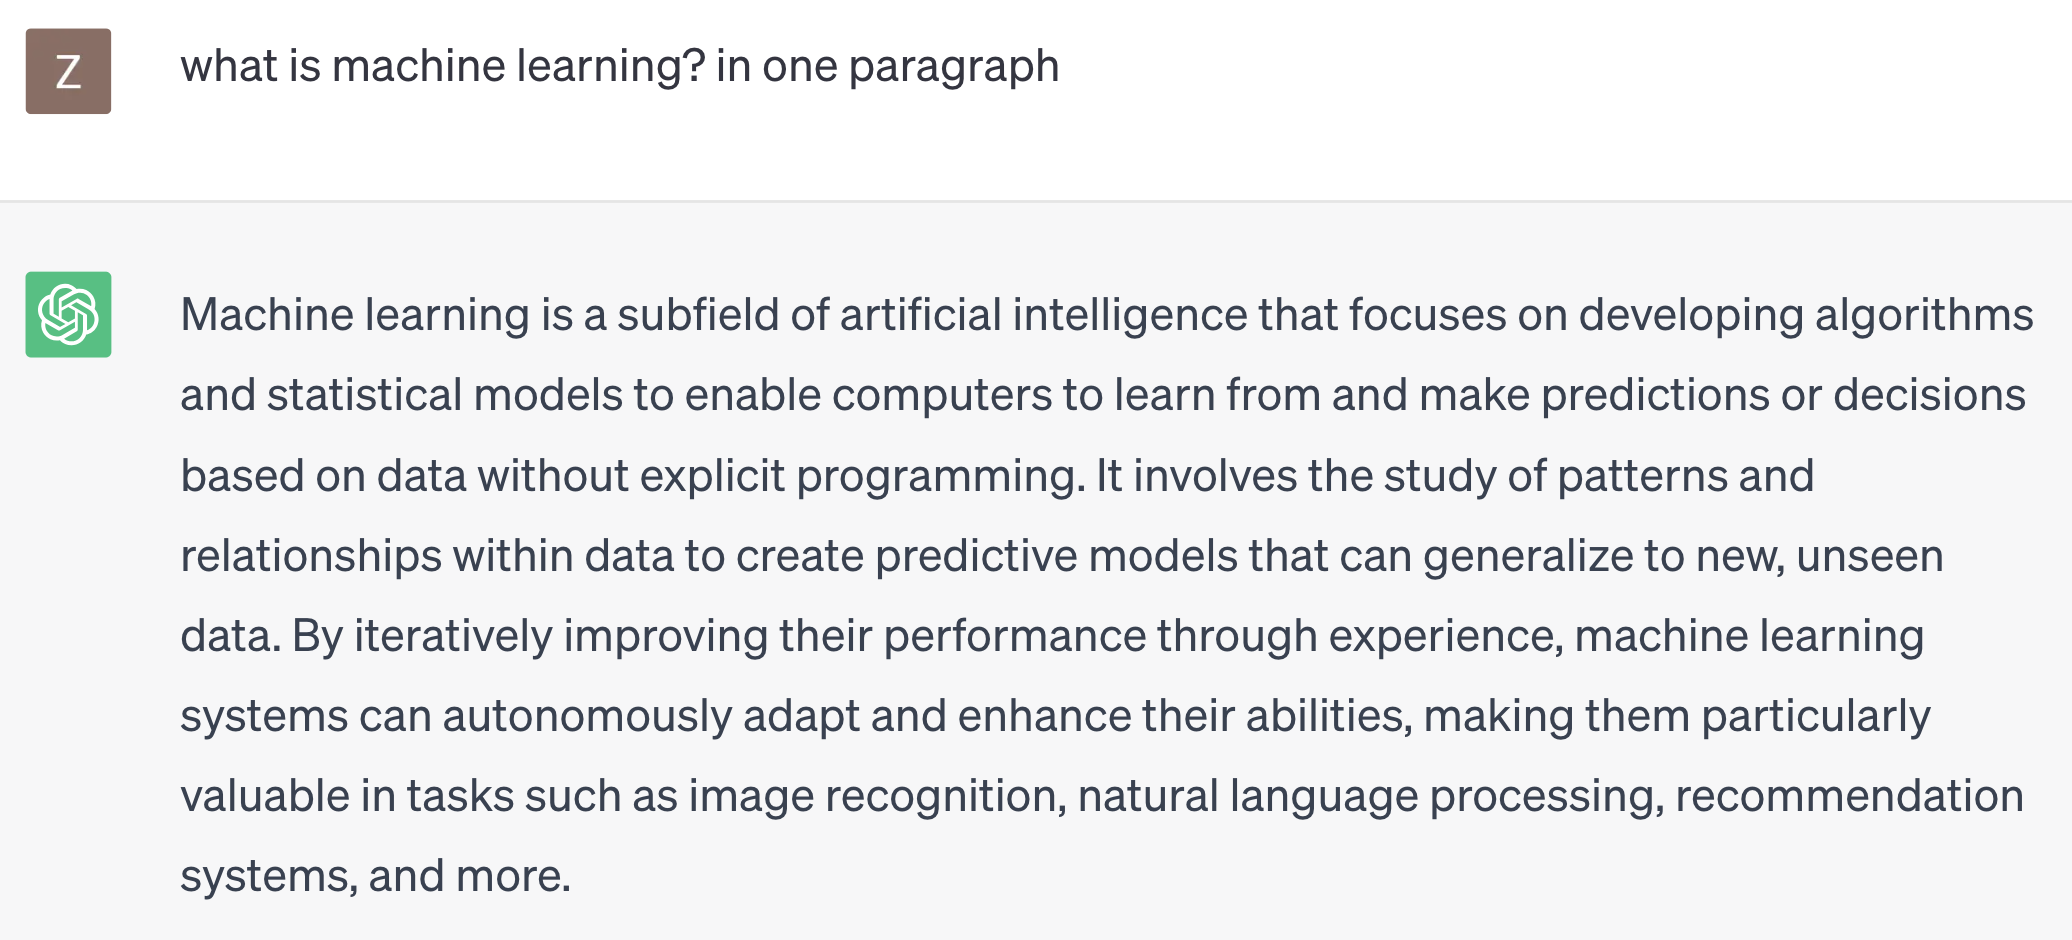
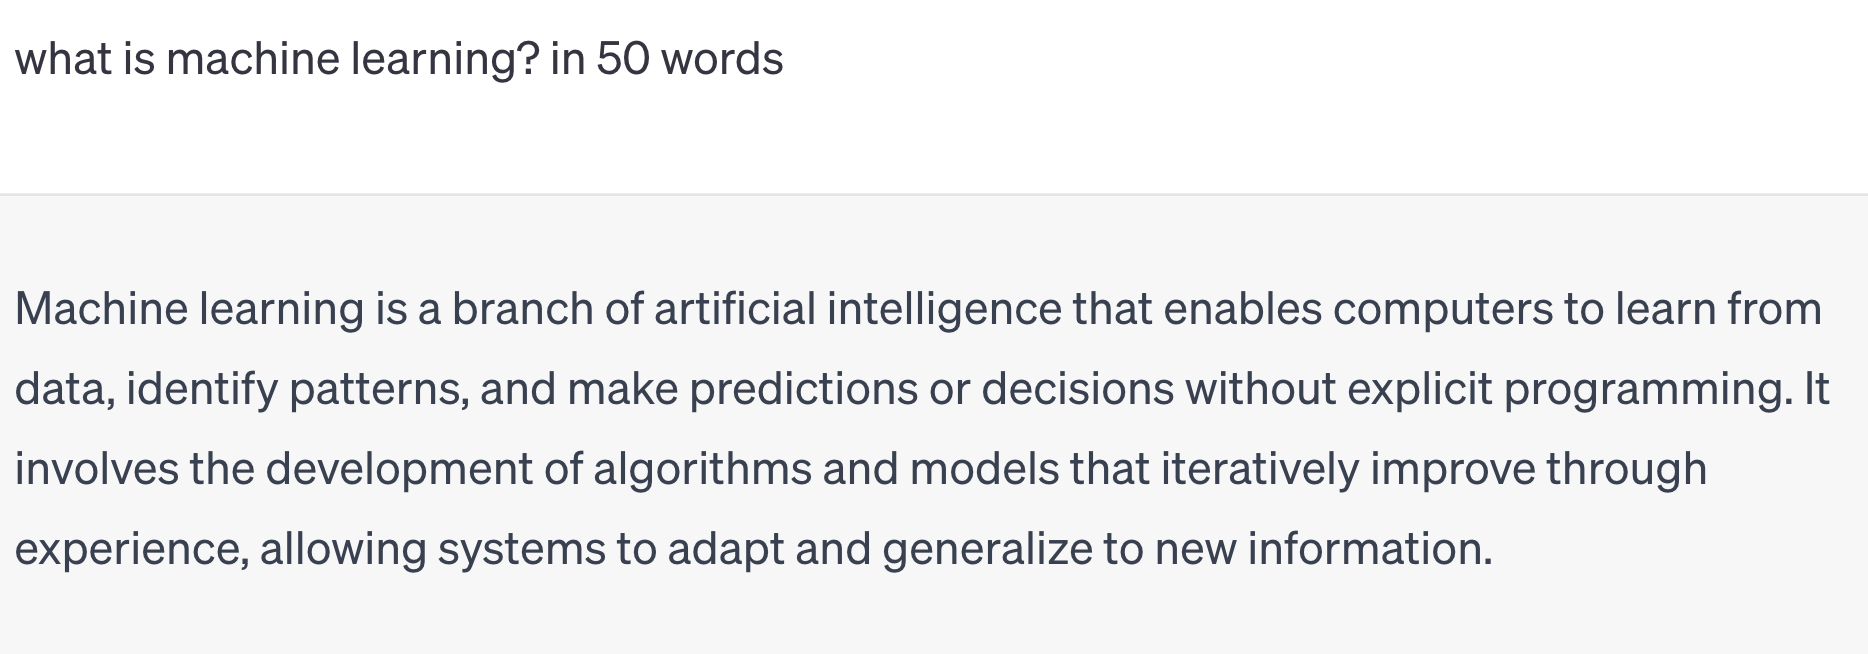

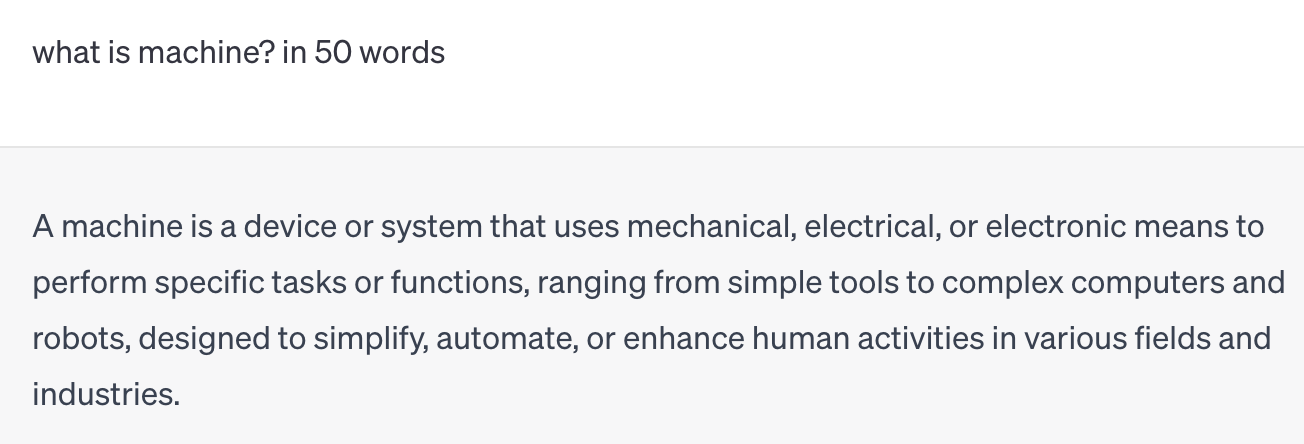

In [517]:
wiki    = "Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines 'discover' their 'own' algorithms, without needing to be explicitly told what to do by any human-developed algorithms. Recently, generative artificial neural networks have been able to surpass results of many previous approaches. Machine learning approaches have been applied to large language models, computer vision, speech recognition, email filtering, agriculture and medicine, where it is too costly to develop algorithms to perform the needed tasks.The mathematical foundations of ML are provided by mathematical optimization methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis through unsupervised learning. ML is known in its application across business problems under the name predictive analytics. Although not all machine learning is statistically-based, computational statistics is an important source of the field's methods."
text_ur = "Machine learning is a subfield of artificial intelligence that focuses on developing algorithms and statistical models to enable computers to learn from and make predictions or decisions based on data without explicit programming. It involves the study of patterns and relationships within data to create predictive models that can generalize to new, unseen data. By iteratively improving their performance through experience, machine learning systems can autonomously adapt and enhance their abilities, making them particularly valuable in tasks such as image recognition, natural language processing, recommendation systems, and more."
text_50 = "Machine learning is a branch of artificial intelligence that enables computers to learn from data, identify patterns, and make predictions or decisions without explicit programming. It involves the development of algorithms and models that iteratively improve through experience, allowing systems to adapt and generalize to new information."
text_30 = "Machine learning is AI's subset, where algorithms and models learn from data to make predictions or decisions without explicit programming, improving performance through experience."
text_10 = "AI algorithms learning from data to make predictions autonomously."
text_err = "A machine is a device or system that uses mechanical, electrical, or electronic means to perform specific tasks or functions, ranging from simple tools to complex computers and robots, designed to simplify, automate, or enhance human activities in various fields and industries."
text_cheat1 = str('machine learning '* 50)
text_cheat2 = str('machine learning '* 5+ 'a '*5 + 'and ' *5 + 'the ' *5 + 'to ' *5 + 'of '*5)

In [515]:
text_cheating2

'machine learning machine learning machine learning machine learning machine learning a a a a a and and and and and the the the the the to to to to to of of of of of '

In [518]:
import nltk
from nltk.tokenize import word_tokenize

import re

wiki_split1     = word_tokenize(wiki)
text_ur_split1  = word_tokenize(text_ur)
text_50_split1  = word_tokenize(text_50)
text_30_split1  = word_tokenize(text_30)
text_10_split1  = word_tokenize(text_10)
text_err_split1 = word_tokenize(text_err)
text_cheat1_split1 = word_tokenize(text_cheat1)
text_cheat2_split1 = word_tokenize(text_cheat2)


wiki_nopunc     = re.sub(r'[^\w\s]','',wiki)
text_ur_nopunc  = re.sub(r'[^\w\s]','',text_ur)
text_50_nopunc  = re.sub(r'[^\w\s]','',text_50)
text_30_nopunc  = re.sub(r'[^\w\s]','',text_30)
text_10_nopunc  = re.sub(r'[^\w\s]','',text_10)
text_err_nopunc = re.sub(r'[^\w\s]','',text_err)

wiki_split2     = word_tokenize(wiki_nopunc)
text_ur_split2  = word_tokenize(text_ur_nopunc)
text_50_split2  = word_tokenize(text_50_nopunc)
text_30_split2  = word_tokenize(text_30_nopunc)
text_10_split2  = word_tokenize(text_10_nopunc)
text_err_split2 = word_tokenize(text_err_nopunc)
text_cheat1_split2 = text_cheat1_split1
text_cheat2_split2 = text_cheat2_split1

#tokenizer       = TreebankWordTokenizer()
#wiki_split2     = tokenizer.tokenize(wiki)
#text_ur_split2  = tokenizer.tokenize(text_ur)
#text_50_split2  = tokenizer.tokenize(text_50)
#text_30_split2  = tokenizer.tokenize(text_30)
#text_10_split2  = tokenizer.tokenize(text_10)
#text_err_split2 = tokenizer.tokenize(text_err)


In [268]:
text_30

"Machine learning is AI's subset, where algorithms and models learn from data to make predictions or decisions without explicit programming, improving performance through experience."

In [269]:
text_30_split1

['Machine',
 'learning',
 'is',
 'AI',
 "'s",
 'subset',
 ',',
 'where',
 'algorithms',
 'and',
 'models',
 'learn',
 'from',
 'data',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'explicit',
 'programming',
 ',',
 'improving',
 'performance',
 'through',
 'experience',
 '.']

In [270]:
text_30_split2

['Machine',
 'learning',
 'is',
 'AIs',
 'subset',
 'where',
 'algorithms',
 'and',
 'models',
 'learn',
 'from',
 'data',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'explicit',
 'programming',
 'improving',
 'performance',
 'through',
 'experience']

In [508]:
text_cheating_split1

['machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',
 'machine',
 'learning',


## Rouge

In [272]:
rouge = Rouge()

In [337]:
def calc_rouge(candidate,reference):
    scores_ur = rouge.get_scores(candidate,reference)
    scores_ur[0]['rouge-1']
    scores_ur[0]['rouge-2']
    scores_ur[0]['rouge-l']
    
    df1 = pd.DataFrame.from_dict(scores_ur[0]['rouge-1'],orient='index', columns=['rouge-1'])
    df2 = pd.DataFrame.from_dict(scores_ur[0]['rouge-2'],orient='index', columns=['rouge-2'])
    df3 = pd.DataFrame.from_dict(scores_ur[0]['rouge-l'],orient='index', columns=['rouge-l'])
    
    result_df = pd.concat([df1, df2, df3], axis=1)
    return(result_df)

In [520]:
print('wiki')
print(calc_rouge(candidate=wiki,reference=wiki))
print('text_ur')
print(calc_rouge(candidate=text_ur,reference=wiki))
print('text_50')
print(calc_rouge(candidate=text_50,reference=wiki))
print('text_30')
print(calc_rouge(candidate=text_30,reference=wiki))
print('text_10')
print(calc_rouge(candidate=text_10,reference=wiki))
print('text_err')
print(calc_rouge(candidate=text_err,reference=wiki))
print('text_cheat1')
print(calc_rouge(candidate=text_cheat1,reference=wiki))
print('text_cheat2')
print(calc_rouge(candidate=text_cheat2,reference=wiki))



wiki
   rouge-1  rouge-2  rouge-l
r      1.0      1.0      1.0
p      1.0      1.0      1.0
f      1.0      1.0      1.0
text_ur
    rouge-1   rouge-2   rouge-l
r  0.184211  0.026846  0.157895
p  0.291667  0.045977  0.250000
f  0.225806  0.033898  0.193548
text_50
    rouge-1   rouge-2   rouge-l
r  0.114035  0.033557  0.114035
p  0.317073  0.108696  0.317073
f  0.167742  0.051282  0.167742
text_30
    rouge-1   rouge-2   rouge-l
r  0.087719  0.013423  0.070175
p  0.416667  0.086957  0.333333
f  0.144928  0.023256  0.115942
text_10
    rouge-1  rouge-2   rouge-l
r  0.035088      0.0  0.026316
p  0.444444      0.0  0.333333
f  0.065041      0.0  0.048780
text_err
    rouge-1   rouge-2   rouge-l
r  0.078947  0.013423  0.061404
p  0.250000  0.048780  0.194444
f  0.120000  0.021053  0.093333
text_cheat1
    rouge-1   rouge-2   rouge-l
r  0.017544  0.006711  0.017544
p  1.000000  0.500000  1.000000
f  0.034483  0.013245  0.034483
text_cheat2
    rouge-1   rouge-2   rouge-l
r  0.061404  0.006

## BLEU

In [460]:
def calc_bleu(candidate,reference):
    print('Individual 1-gram: %f' % sentence_bleu([reference], candidate, weights=(1, 0, 0, 0)))
    print('Individual 2-gram: %f' % sentence_bleu([reference], candidate, weights=(0, 1, 0, 0)))
    print('Individual 3-gram: %f' % sentence_bleu([reference], candidate, weights=(0, 0, 1, 0)))
    print('Individual 4-gram: %f' % sentence_bleu([reference], candidate, weights=(0, 0, 0, 1)))
    print('Cumulative 1-gram: %f' % sentence_bleu([reference], candidate, weights=(1, 0, 0, 0)))
    print('Cumulative 2-gram: %f' % sentence_bleu([reference], candidate, weights=(0.5, 0.5, 0, 0)))
    print('Cumulative 3-gram: %f' % sentence_bleu([reference], candidate, weights=(0.33, 0.33, 0.33, 0)))
    print('Cumulative 4-gram: %f' % sentence_bleu([reference], candidate, weights=(0.25, 0.25, 0.25, 0.25)))


In [487]:
print('include punctuation')
calc_bleu(wiki_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(wiki_split1,wiki_split2)

include punctuation
Individual 1-gram: 1.000000
Individual 2-gram: 1.000000
Individual 3-gram: 1.000000
Individual 4-gram: 1.000000
Cumulative 1-gram: 1.000000
Cumulative 2-gram: 1.000000
Cumulative 3-gram: 1.000000
Cumulative 4-gram: 1.000000
exclude punctuation
Individual 1-gram: 0.828571
Individual 2-gram: 0.689655
Individual 3-gram: 0.589595
Individual 4-gram: 0.511628
Cumulative 1-gram: 0.828571
Cumulative 2-gram: 0.755929
Cumulative 3-gram: 0.698361
Cumulative 4-gram: 0.644344


In [462]:
print('include punctuation')
calc_bleu(text_ur_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_ur_split1,wiki_split2)

include punctuation
Individual 1-gram: 0.170688
Individual 2-gram: 0.027967
Individual 3-gram: 0.447480
Individual 4-gram: 0.447480
Cumulative 1-gram: 0.170688
Cumulative 2-gram: 0.069092
Cumulative 3-gram: 0.130402
Cumulative 4-gram: 0.175833
exclude punctuation
Individual 1-gram: 0.163733
Individual 2-gram: 0.023634
Individual 3-gram: 0.567219
Individual 4-gram: 0.567219
Cumulative 1-gram: 0.163733
Cumulative 2-gram: 0.062207
Cumulative 3-gram: 0.131889
Cumulative 4-gram: 0.187843


In [463]:
print('include punctuation')
calc_bleu(text_50_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_50_split1,wiki_split2)

include punctuation
Individual 1-gram: 0.043345
Individual 2-gram: 0.011049
Individual 3-gram: 0.001878
Individual 4-gram: 0.093913
Cumulative 1-gram: 0.043345
Cumulative 2-gram: 0.021884
Cumulative 3-gram: 0.009875
Cumulative 4-gram: 0.017048
exclude punctuation
Individual 1-gram: 0.053403
Individual 2-gram: 0.014329
Individual 3-gram: 0.002923
Individual 4-gram: 0.146157
Cumulative 1-gram: 0.053403
Cumulative 2-gram: 0.027663
Cumulative 3-gram: 0.013398
Cumulative 4-gram: 0.023912


In [464]:
print('include punctuation')
calc_bleu(text_30_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_30_split2,wiki_split2)

include punctuation
Individual 1-gram: 0.002811
Individual 2-gram: 0.000583
Individual 3-gram: 0.005248
Individual 4-gram: 0.005248
Cumulative 1-gram: 0.002811
Cumulative 2-gram: 0.001280
Cumulative 3-gram: 0.002068
Cumulative 4-gram: 0.002592
exclude punctuation
Individual 1-gram: 0.002213
Individual 2-gram: 0.000420
Individual 3-gram: 0.004828
Individual 4-gram: 0.004828
Cumulative 1-gram: 0.002213
Cumulative 2-gram: 0.000964
Cumulative 3-gram: 0.001667
Cumulative 4-gram: 0.002157


In [465]:
print('include punctuation')
calc_bleu(text_10_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_10_split2,wiki_split2)

include punctuation
Individual 1-gram: 0.000000
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000
Cumulative 1-gram: 0.000000
Cumulative 2-gram: 0.000000
Cumulative 3-gram: 0.000000
Cumulative 4-gram: 0.000000
exclude punctuation
Individual 1-gram: 0.000000
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000
Cumulative 1-gram: 0.000000
Cumulative 2-gram: 0.000000
Cumulative 3-gram: 0.000000
Cumulative 4-gram: 0.000000


In [466]:
print('include punctuation')
calc_bleu(text_err_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_err_split2,wiki_split2)

include punctuation
Individual 1-gram: 0.028075
Individual 2-gram: 0.003184
Individual 3-gram: 0.076426
Individual 4-gram: 0.076426
Cumulative 1-gram: 0.028075
Cumulative 2-gram: 0.009455
Cumulative 3-gram: 0.019242
Cumulative 4-gram: 0.026882
exclude punctuation
Individual 1-gram: 0.020821
Individual 2-gram: 0.003555
Individual 3-gram: 0.072872
Individual 4-gram: 0.072872
Cumulative 1-gram: 0.020821
Cumulative 2-gram: 0.008603
Cumulative 3-gram: 0.017789
Cumulative 4-gram: 0.025038


In [521]:
print('include punctuation')
calc_bleu(text_cheat1_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_cheat1_split2,wiki_split2)

include punctuation
Individual 1-gram: 0.023618
Individual 2-gram: 0.004771
Individual 3-gram: 0.472367
Individual 4-gram: 0.472367
Cumulative 1-gram: 0.023618
Cumulative 2-gram: 0.010616
Cumulative 3-gram: 0.038582
Cumulative 4-gram: 0.070813
exclude punctuation
Individual 1-gram: 0.029726
Individual 2-gram: 0.006005
Individual 3-gram: 0.594521
Individual 4-gram: 0.594521
Cumulative 1-gram: 0.029726
Cumulative 2-gram: 0.013361
Cumulative 3-gram: 0.048559
Cumulative 4-gram: 0.089125


In [522]:
print('include punctuation')
calc_bleu(text_cheat2_split1,wiki_split1)
print('exclude punctuation')
calc_bleu(text_cheat2_split2,wiki_split2)

include punctuation
Individual 1-gram: 0.011513
Individual 2-gram: 0.000539
Individual 3-gram: 0.018316
Individual 4-gram: 0.018316
Cumulative 1-gram: 0.011513
Cumulative 2-gram: 0.002490
Cumulative 3-gram: 0.004908
Cumulative 4-gram: 0.006754
exclude punctuation
Individual 1-gram: 0.022211
Individual 2-gram: 0.001039
Individual 3-gram: 0.035336
Individual 4-gram: 0.035336
Cumulative 1-gram: 0.022211
Cumulative 2-gram: 0.004805
Cumulative 3-gram: 0.009469
Cumulative 4-gram: 0.013030


['this', 'is', 'a', 'test']